In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import scipy
from scipy import io
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

## Regularized linear regression

In [38]:
# read in dataset from the course
df = scipy.io.loadmat('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex5/ex5/ex5data1.mat')

In [39]:
df['X']

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [40]:
df['Xval']

array([[-16.74653578],
       [-14.57747075],
       [ 34.51575866],
       [-47.01007574],
       [ 36.97511905],
       [-40.68611002],
       [ -4.47201098],
       [ 26.53363489],
       [-42.7976831 ],
       [ 25.37409938],
       [-31.10955398],
       [ 27.31176864],
       [ -3.26386201],
       [ -1.81827649],
       [-40.7196624 ],
       [-50.01324365],
       [-17.41177155],
       [  3.5881937 ],
       [  7.08548026],
       [ 46.28236902],
       [ 14.61228909]])

In [41]:
df['Xtest']

array([[-33.31800399],
       [-37.91216403],
       [-51.20693795],
       [ -6.13259585],
       [ 21.26118327],
       [-40.31952949],
       [-14.54153167],
       [ 32.55976024],
       [ 13.39343255],
       [ 44.20988595],
       [ -1.14267768],
       [-12.76686065],
       [ 34.05450539],
       [ 39.22350028],
       [  1.97449674],
       [ 29.6217551 ],
       [-23.66962971],
       [ -9.01180139],
       [-55.94057091],
       [-35.70859752],
       [  9.51020533]])

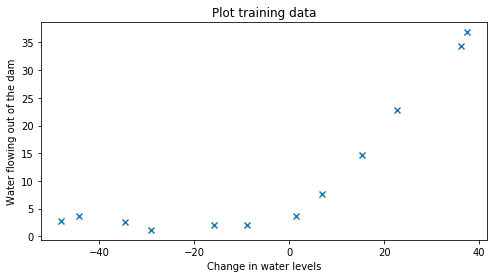

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(df['X'], df['y'],marker='x')
ax.set_ylabel('Water flowing out of the dam')
ax.set_xlabel('Change in water levels')
ax.set_title('Plot training data');

### Ex. 1 Regularized linear regression cost function

In [43]:
theta = np.array([[1], [1]])
theta

array([[1],
       [1]])

In [44]:
X_1 = np.hstack(((np.ones((df['X'].shape[0], 1))), df['X']))
Xval_1 = np.hstack(((np.ones((df['Xval'].shape[0], 1))), df['Xval']))

In [45]:
def linearRegCostFunction(X, y, theta, lmbda):
    
    theta = np.reshape(theta, (-1, y.shape[1]))
    m= len(y)
    
    J = np.sum(np.power((np.dot(X, theta) - y),2))/(2*m) + np.dot(lmbda, sum((theta[1:])**2)/(2*m))
    grad = 1/m * np.dot(X.T, np.dot(X, theta) - y) + np.dot(lmbda, theta)/(m)
    
    # unregularize first gradient
    grad_no_reg = 1/m * np.dot(X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_reg[0]
    
    return J, grad.flatten()

In [46]:
J, grad = linearRegCostFunction(X_1, df['y'], theta, 1)

In [47]:
J

array([303.99319222])

In [48]:
grad

array([-15.30301567, 598.25074417])

### Fit linear regression line

In [49]:
def trainLinearReg(X, y, lmbda):
    initial_theta = np.zeros((X.shape[1], 1))
    
    def costFunction(theta):
        return linearRegCostFunction(X, y, theta, lmbda)
    
    results = opt.minimize(costFunction, 
                           x0=initial_theta, 
                           options={'disp': True, 'maxiter':200}, 
                           method="L-BFGS-B", jac=True)
    theta = results.x
    return theta

In [50]:
theta = trainLinearReg(X_1, df['y'], 1)

In [51]:
theta

array([13.08771416,  0.367742  ])

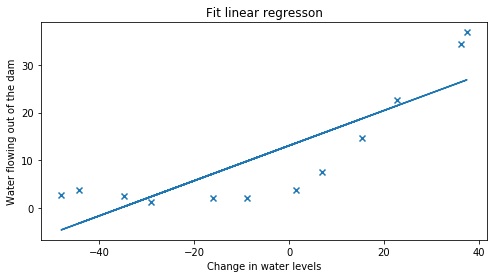

In [52]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel('Water flowing out of the dam')
ax.set_xlabel('Change in water levels')
plt.title('Fit linear regresson')
plt.scatter(df['X'], df['y'], marker='x')
plt.plot(df['X'], np.dot(np.insert(df['X'], 0, 1, axis=1), theta));

### Ex. 2 Learning curve

In [53]:
def learningCurve(X, y, Xval, yval, lmbda):
    error_train = []
    error_val = []
    m = len(y)
    for i in range(1, X.shape[0]+1):
        theta = trainLinearReg(X[:i], y[:i], lmbda)
        error_train.append(linearRegCostFunction(X[:i], y[:i], theta, lmbda)[0])
        error_val.append(linearRegCostFunction(Xval, yval, theta, lmbda)[0])
    return error_train, error_val

In [54]:
error_train, error_val = learningCurve(X_1, df['y'], Xval_1, df['yval'], 1)

In [55]:
error_val

[array([138.84677698]),
 array([110.64774544]),
 array([44.97891335]),
 array([48.34641328]),
 array([35.86334576]),
 array([33.82763432]),
 array([31.97009308]),
 array([30.8628761]),
 array([31.13690081]),
 array([28.93857186]),
 array([29.55419285]),
 array([29.43639657])]

In [56]:
m = len(df['y'])

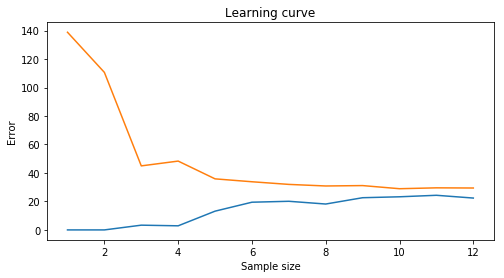

In [57]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel('Error')
ax.set_xlabel('Sample size')
plt.title('Learning curve')
plt.plot(range(1,m+1), error_train, label='Train')
plt.plot(range(1,m+1), error_val, label='Cross Validation');

### Ex. 3 Polynomial features

In [91]:
def polyFeatures(X,p):
    X_poly = X
    if p >= 2:
        for k in range(1,p):
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))
    return X_poly

In [92]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [93]:
poly_X = polyFeatures(df['X'], 8)

In [94]:
poly_X.shape

(12, 8)

In [95]:
norm_X, mu, sigma = featureNormalize(poly_X)

In [96]:
norm_X

array([[-3.78243704e-01, -7.88662325e-01,  1.90328720e-01,
        -7.37591303e-01,  3.20251970e-01, -6.17151602e-01,
         3.59835014e-01, -5.31091256e-01],
       [-8.38920100e-01,  1.31420204e-03, -2.58961742e-01,
        -3.41564822e-01,  9.75492734e-02, -4.55196644e-01,
         2.66773432e-01, -4.68873807e-01],
       [ 1.43871736e+00,  6.10831582e-01,  1.30534069e+00,
         2.56220001e-01,  1.02186338e+00, -1.26962121e-02,
         7.90210009e-01, -1.77926980e-01],
       [ 1.48412330e+00,  7.38068463e-01,  1.42031240e+00,
         4.13121830e-01,  1.15534830e+00,  1.31223708e-01,
         9.10700224e-01, -6.22895388e-02],
       [-1.49791929e+00,  1.93643966e+00, -2.12774745e+00,
         2.43510061e+00, -2.51876748e+00,  2.71792174e+00,
        -2.76331690e+00,  2.88908182e+00],
       [-1.34409278e-01, -1.01936614e+00,  2.62563148e-01,
        -7.72577738e-01,  3.31046537e-01, -6.21453712e-01,
         3.61188658e-01, -5.31586524e-01],
       [ 7.10844248e-01, -8.147136

In [97]:
norm_X_1 = np.hstack(((np.ones((norm_X.shape[0], 1))), norm_X))

In [98]:
theta = trainLinearReg(norm_X_1, df['y'], 0)

In [99]:
theta

array([ 11.21760993,   9.13620027,  18.18175205,  28.88133228,
       -27.26555747, -74.33371257,   6.85483834,  60.57072015,
        20.55581258])

In [106]:
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(df['Xval'], 8)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)), X_poly_val))

In [107]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05)) # 1D vector
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma
    X_poly = np.hstack((np.ones((x.shape[0],1)), X_poly))
    plt.plot(x, np.dot(X_poly, theta), '--', linewidth=2)

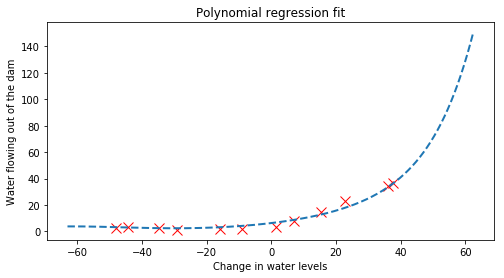

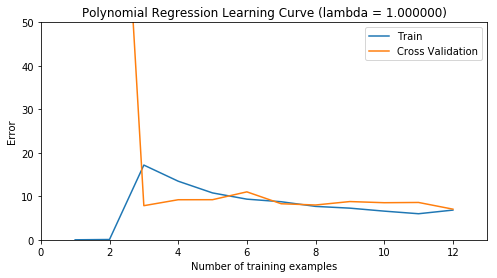

In [114]:
lambda_val = 1;
theta = trainLinearReg(norm_X_1, df['y'], lambda_val)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df['X'], df['y'], 'rx', markersize=10, linewidth=1.5)
plotFit(min(df['X']), max(df['X']), mu, sigma, theta, 8)
ax.set_xlabel('Change in water levels') 
ax.set_ylabel('Water flowing out of the dam')
ax.set_title ('Polynomial regression fit')

fig2, ax2 = plt.subplots(figsize=(8,4))
error_train, error_val = learningCurve(norm_X_1, df['y'], X_poly_val, df['yval'], lambda_val)
p1, p2 = ax2.plot(range(1,m+1), error_train, range(1,m+1), error_val)

ax2.set_title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('Error')
ax2.set_xlim(0,13)
ax2.set_ylim(0, 50)
ax2.legend((p1, p2), ('Train', 'Cross Validation'));

### Ex. 4 Cross validation

In [130]:
lmbda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [131]:
def validationCurve(X, y, Xval, yval, lmbda_vec):
    error_train = []
    error_val = []
    for i in range(len(lmbda_vec)):
        lmbda_val = lmbda_vec[i]     
        theta = trainLinearReg(X, y, lmbda_val)
        error_train.append(linearRegCostFunction(X, y, theta, 0)[0])
        error_val.append(linearRegCostFunction(Xval, yval, theta,0)[0])
    return lmbda_vec, error_train, error_val

In [132]:
lmbda_vec, error_train, error_val = validationCurve(norm_X_1, df['y'], X_poly_val, df['yval'], lmbda_vec)

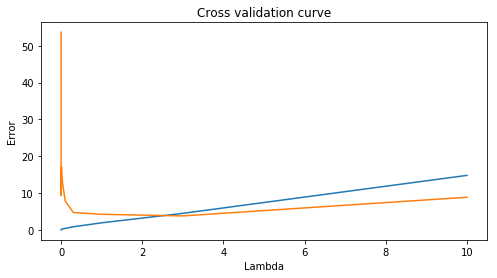

In [133]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel('Error')
ax.set_xlabel('Lambda')
plt.title('Cross validation curve')
plt.plot(lmbda_vec, error_train, label='Train')
plt.plot(lmbda_vec, error_val, label='Cross Validation');